<IPython.core.display.Javascript object>


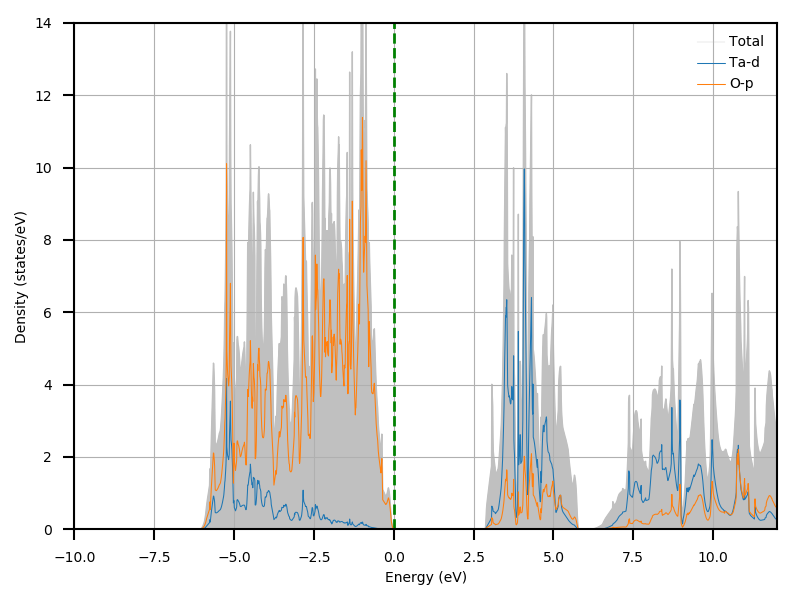

<IPython.core.display.Javascript object>


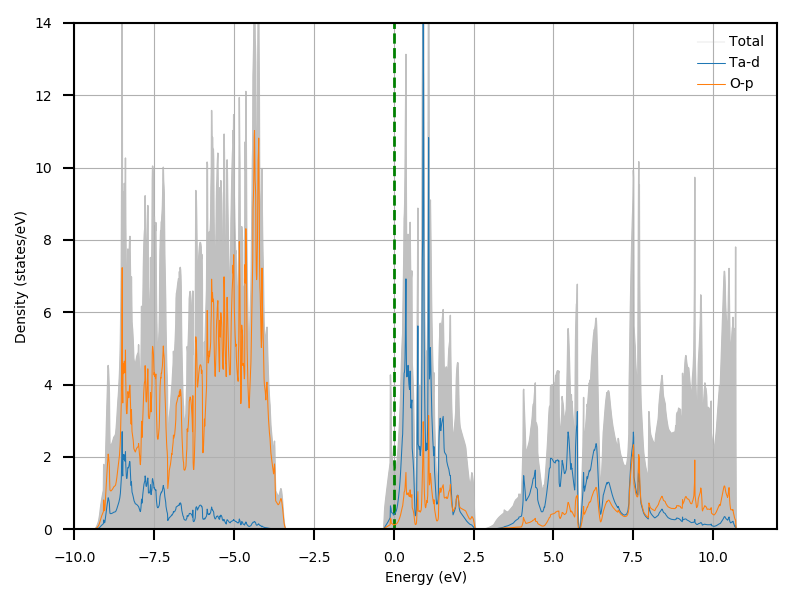

<IPython.core.display.Javascript object>


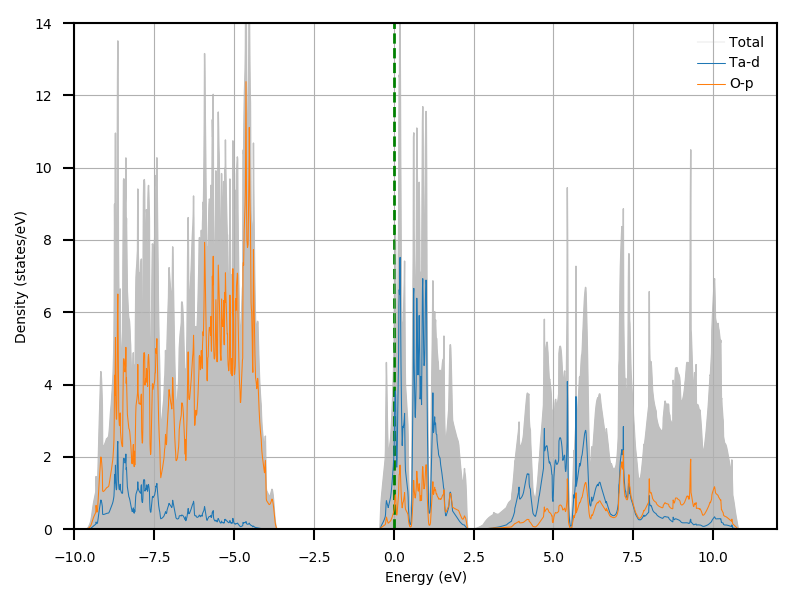

<IPython.core.display.Javascript object>


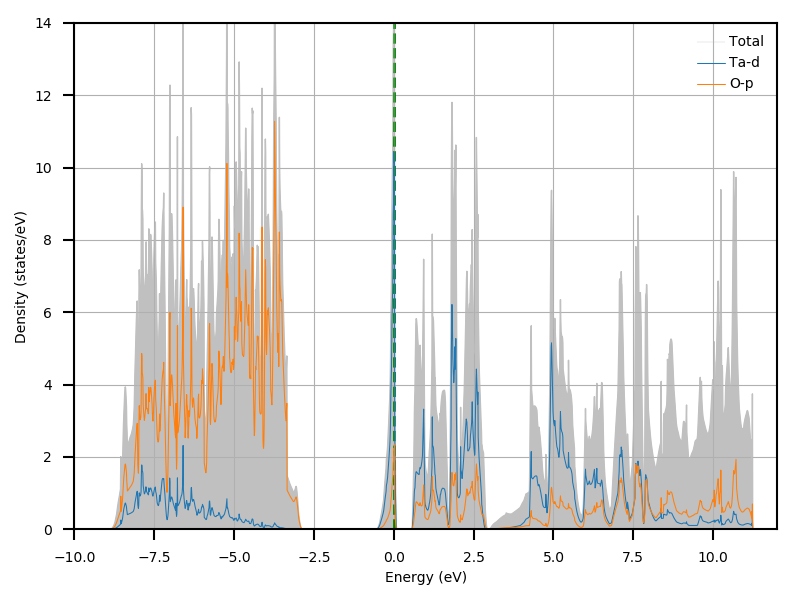

<IPython.core.display.Javascript object>


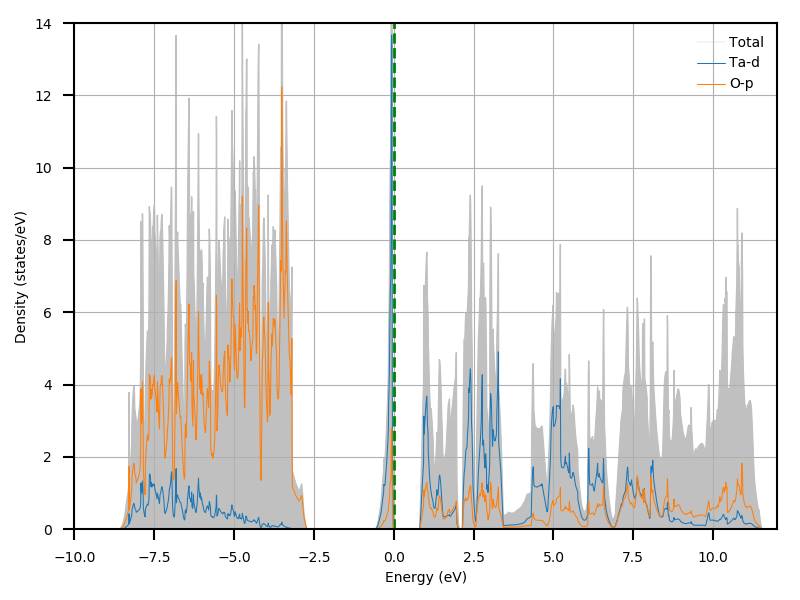

In [3]:
import matplotlib.pyplot as plt
import scipy
%matplotlib notebook
### Plot eDOS from .dat file ###

#### EDIT ME ##############################################################
DATA_LOC_ROOT = 'dos_'
DATA_LOC_SUFFIXES = [['d0'],['d025'],['d05'],['d075'],['d1']]
LABELS = ['Total', 'Ta-d', 'O-p']
FILETYPE = '.dat'

SAVE_DIR = 'figures/'
SAVE_NAMES = ['dos_d0','dos_d025','dos_d05','dos_d075','dos_d1']

XLIMS = [[-10,12]]*5
YLIMS = [[0,14]]*5

FILL = {'tot','atom-d','atom'} # these data will be filled in the plot

PLOT_TITLE = 'Electronic DoS for MgTa2O6'
X_AXIS = 'Energy (eV)'
Y_AXIS = 'Density (states/eV)'
SKIP = 0   # annoying p4v puts total DOS in front every time
PLOT_TOT = True
NORM = 2   # number of formula units contained in poscar
##############################################################################

SKIP_OG = SKIP
## Extracting data
for i, plotGroup in enumerate(DATA_LOC_SUFFIXES):
    fig = plt.figure(figsize=(8, 6))
    plt.axvline(x=0,color='green',linestyle='--')
    #fig = plt.figure()
    for suffix in plotGroup:
        with open(DATA_LOC_ROOT + suffix + FILETYPE,'r') as file:
            data = file.read().split('\n\n')
            
            first = True
#             if PLOT_TOT:
#                 first = False
#             else:
#                 first = True
#             if suffix == 'tot': #If we want total DOS, we don't want to skip
#                 print('Total!')
#                 SKIP_OG = SKIP
#                 SKIP = 0
#                 first = False
#                 data = data[SKIP:SKIP+1]
            for j, group in enumerate(data[SKIP:]): 
                SKIP = SKIP_OG #reset skip
                if len(group) > 10:
                    pairs = group.split()
                    #print(pairs)
                    xs = [float(x) for x in pairs[0::2]]
                    ys = [float(x)/NORM for x in pairs[1::2]]  
                    if suffix in FILL or first:
                        plt.plot(xs,ys,linewidth=0.25,color='silver', label=LABELS[j])
                        d = scipy.zeros(len(ys))
                        plt.fill_between(xs, ys, where=ys>=d, interpolate=True, color='silver')
                        first = False
                    else:
                        plt.plot(xs, ys, linewidth=0.75, label=LABELS[j])    
                   
                elif len(group) > 10 and first:
                    first = False
    ## Plotting
    #plt.title(PLOT_TITLE)
    plt.grid(True)
    plt.xlabel(X_AXIS)
    plt.ylabel(Y_AXIS)
    plt.xlim(XLIMS[i])
    plt.ylim(YLIMS[i])
    #plt.ylim(bottom=0)
    plt.legend()

    plt.show()

    ## Saving plot
    fig.savefig(SAVE_DIR + SAVE_NAMES[i] + '.pdf',bbox_inches='tight')

# # Tabulating/saving table
# with open(FILE_NAME + '.txt', 'w+') as file:
#     file.write('{}\t{}'.format(labels[0],labels[1]))
#     for i in range(len(xs)):
#         file.write('\n' + str(round(xs[i],X_ROUND)) + "\t" + str(round(ys[i],Y_ROUND)))